In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D, get_test_data
import numpy as np
from time import time
import matplotlib
import matplotlib.animation as animation
from matplotlib import rc
from IPython.display import HTML

In [2]:
#Gradient of the hamronic potential. In this case the derivative is very easy, namely (x, y).
def grad_harmonic_potential(xy):
    return xy

def velocity_verlet_step(r, p, dt, m):
    """Returns the new position and momentum after one step in the velocity verlet algorithm."""
    r_new = r + dt / m * p - 0.5 * dt**2 / m * grad_harmonic_potential(r)
    p_new = p - dt / 2 * (grad_harmonic_potential(r) + grad_harmonic_potential(r_new))
    return r_new, p_new

def velocity_verlet(r_ini, p_ini, dt = 0.01, m = 1, steps = 10):
    """Performs the velocity verlet algorithm by doing the velocity_verlet_step steps-times.
    Returns a list of all positions and momenta for plotting.
    """
    pos = np.zeros([steps + 1, 2])
    pos[0] = r_ini
    momenta = np.zeros([steps + 1, 2])
    momenta[0] = p_ini
    for i in range (0, steps):
        pos[i+1], momenta[i+1] = velocity_verlet_step(pos[i], momenta[i], dt, m)  
    return pos, momenta

**Comment**: your ``velocity_verlet_step()`` recomputes the gradient two times (you should know ``grad_harmonic_potential()`` from the previous iteration): While this is not important, here, it will be a huge slowdown in a realistic experiment.

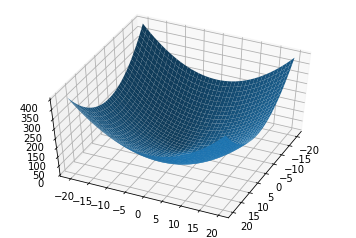

In [3]:
#initial conditions
r_ini = np.array([1,0])
p_ini = np.array([0,100])
number_steps = 1000

"""Create 3D animation (ffmpeg is needed to convert the animation into a video)"""

fig = plt.figure()

ax = fig.add_subplot(111, projection = '3d')

X = np.arange(-20, 20, 0.25)
Y = np.arange(-20, 20, 0.25)
X, Y = np.meshgrid(X, Y)
Z = (X**2 + Y**2) / 2

surf = ax.plot_surface(X, Y, Z)
# rotate the axes and update
ax.view_init(50, 25)


r_ini = np.array([-15, 0])
p_ini = np.array([0, 10])
number_steps = 1000
pos, momenta = velocity_verlet(r_ini, p_ini, dt=0.1, steps=number_steps)
x = pos[:, 0]
y = pos[:, 1]
z = (x**2 + y**2) / 2 + 0.1


ims = []
for i in np.arange(0, 190, 5):
    ims.append(plt.plot([x[i]], [y[i]], zs=z[i], marker="o", markersize=10, c="orange"))
    
im_ani = animation.ArtistAnimation(fig, ims, interval=100, repeat_delay=3000, blit=True)

In [4]:
#Check if movie writers are available
print(matplotlib.animation.writers.list())

['imagemagick', 'imagemagick_file']


In [ ]:
HTML(im_ani.to_html5_video())

In [5]:
# equivalent to rcParams['animation.html'] = 'html5'
rc('animation', html='html5')

In [ ]:
im_ani

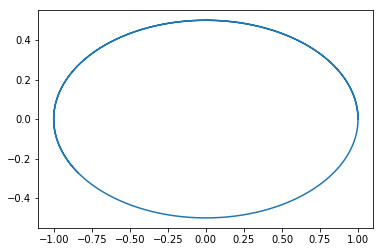

In [6]:
r, p = velocity_verlet([1.0, 0.0], [0.0, 0.5], dt=0.01, m=1.0, steps=1000)
plt.plot(*r.T)

## Summary

Too bad that your visualisation does not work on my machine, but your code is correct. Well done!